<div align="center">
<h2>Can Experience and Number of Sessions Played Predict Total Mincraft Play Time? A KNN Regression Analysis of Minecraft Server Data</h2

Leena Tagourti, Julie Sieg

# Introduction 

**Background**

Understanding the factors that influence player engagement is crucial in the gaming industry, as it informs game design, marketing strategies, and resource allocation. In this study, we explore the predictive relationship between a player's age and experience on the total time they spend playing on a Minecraft server. Specifically, we use k-Nearest Neighbors (KNN) regression to estimate the number of hours a player dedicates to the game based on these demographic factors.

The Pacific Laboratory for Artificial Intelligence (PLAI) at the University of British Columbia has initiated a project that integrates Minecraft gameplay with artificial intelligence research. By hosting a Minecraft server, PLAI aims to collect detailed gameplay data to advance AI methodologies. Participants register on plaicraft.ai, consent to data collection, and engage in gameplay, contributing valuable data for research purposes. This initiative not only supports AI advancements but also provides players with free access to Minecraft, creating a collaborative research environment.

**Research Question**

This study seeks to answer the following question: Can a player's age and gaming experience predict the total time they spend playing on the PLAI Minecraft server? By addressing this question, we aim to identify whether these demographic factors are significant indicators of player engagement, which could inform targeted recruitment strategies and resource planning for gaming platforms.

**Data Description**

The dataset utilized in this analysis is made up of player information collected from the PLAI Minecraft server. It includes demographic details such as age and self-reported gaming experience, along with behavioral data like total hours spent on the server. The dataset includes a diverse player base, providing a detailed view of engagement patterns across different age groups and experience levels. Prior to analysis, the data underwent wrangling; cleaning and preprocessing to ensure accuracy and consistency, including handling missing values and standardizing data formats. By making use of KNN regression on this dataset, we aim to uncover the relationship between age, experience, and player engagement, contributing to a deeper understanding of factors influencing gaming behavior.

**Table 1: Description of Dataset Variables**

| **Variable Name**     | **Data Type** | **Description**                                                                                   | **Example Value**                                                                                   |
|-----------------------|---------------|---------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| `experience`          | Factor        | Player's self-reported proficiency level in gaming, categorized as 'Amateur' or 'Pro'.            | Pro                                                                                                 |
| `subscribe`           | Logical       | Indicates if the player has subscribed to the game-related newsletter (`TRUE` or `FALSE`).        | TRUE                                                                                                |
| `hashed_email`        | Character     | Hashed representation of the player's email address for anonymity.                                | f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d                                    |
| `played_hours`        | Double        | Total number of hours the player has spent on the server.                                         | 30.3                                                                                                |
| `name`                | Character     | Player's in-game username.                                                                        | Morgan                                                                                              |
| `gender`              | Factor        | Player's self-identified gender.                                                                  | Male                                                                                                |
| `age`                 | Double        | Player's age in years.                                                                            | 9                                                                                                   |
| `start_time`          | Character     | Start timestamp of a specific gaming session, formatted as 'dd/mm/yyyy hh:mm'.                    | 08/08/2024 00:21                                                                                    |
| `end_time`            | Character     | End timestamp of the corresponding gaming session, formatted as 'dd/mm/yyyy hh:mm'.               | 08/08/2024 01:35                                                                                    |
| `original_start_time` | Double        | Original start time represented as a Unix timestamp (milliseconds since epoch).                   | 1.72308e+12                                                                                         |
| `original_end_time`   | Double        | Original end time represented as a Unix timestamp (milliseconds since epoch).                     | 1.72308e+12                                                                                         |


# Methods and Results

#### Load libraries

The first step to analyzing our data is to load the necessary packages for plotting, converting strings to date format, and other functions necessary for our code

In [1]:
library(tidyverse)
library(tidymodels)
library(gridExtra) 
library(ggplot2)
library(RColorBrewer)
library(lubridate)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Load datasets

Next we must load the raw datafiles from the web. Our data is stored in a github repo. There are two datasets, players and sessions, that must be loaded separately. We also print the datasets to determine which variables are stored in each dataframe.

In [2]:
# Read the files into R
url_players <- "https://raw.githubusercontent.com/JulieSieg/dsci_100_independentproject/refs/heads/main/players.csv"
players <- read_csv(url_players)
players

url_sessions <- "https://raw.githubusercontent.com/JulieSieg/dsci_100_independentproject/refs/heads/main/sessions.csv"
sessions <- read_csv(url_sessions)
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### Mutate dates

From the printed dataframes above, we can see that the `start_time` and `end_time` data is stored as a character. In order to figure out the total number of minutes played in each session, these columns must first be converted to datetime format. Then we can use `select` to subtract `start_time` from `end_time` to find the total number of minutes played (`time_played`)

In [3]:
sessions_as_date <- sessions |> 
    mutate(start_datetime = dmy_hm(start_time)) |>
    mutate(end_datetime = dmy_hm(end_time)) |>
    mutate(time_played = end_datetime - start_datetime) |>
    select(hashedEmail, time_played)

sessions_as_date

hashedEmail,time_played
<chr>,<drtn>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,12 mins
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,13 mins
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,23 mins
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,21 mins
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,7 mins
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,19 mins


#### Merge datasets

Player demographic information is stored in the `players` dataframe, but the data for each session is stored in the `sessions` dataframe. However, both dataframes include a unique `hashedEmail` for each user. Therefore we can merge the two datasets using `hashedEmail` to create `merged_data`. 

We can then standardize the column names and use `mutate` to determine the number of sessions per player in a new dataframe called `sessions_counts`.

We then group by `hashedEmail` and `experience` and use `summarize` to find the total number of minutes played by each player across all of their sessions, creating a new dataframe `played_mins`. 

We merge the `session_counts` dataframe and the `played_mins` dataframe using the function `left_join`, grouping by `hashedEmail` once again, creating the dataframe `player_sessions`. 

In [4]:
# Merge the datasets 
merged_data <- players |>
  left_join(sessions_as_date, by = "hashedEmail")

# Rename columns in merged_data
colnames(merged_data) <- c("experience", "subscribe", "hashedEmail", "played_hours", "name", "gender", "age", 
                           "time_played")

session_counts <- merged_data |>
  group_by(hashedEmail) |>
  summarise(total_sessions = n())

played_mins <- merged_data |>
    group_by(hashedEmail, experience, age) |>
    summarize(total_mins = sum(time_played, na.rm = TRUE)) |>
    mutate(total_mins = as.numeric(total_mins))

player_sessions <- session_counts |>
    left_join(played_mins, by = "hashedEmail") |>
    mutate(experience = as_factor(experience)) |>
    drop_na(age)
player_sessions

`summarise()` has grouped output by 'hashedEmail', 'experience'. You can
override using the `.groups` argument.


hashedEmail,total_sessions,experience,age,total_mins
<chr>,<int>,<fct>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,Regular,20,106
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,1,Veteran,17,0
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,Pro,21,30
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,Amateur,23,4795
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,Amateur,17,9
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,Beginner,20,72


## Exploratory Visualizations

#### Plot total session number

To determine if and how total number of session differs by player experience, we use `ggplot` to create a bar graph of the mean number of sessions of players of each experience level.

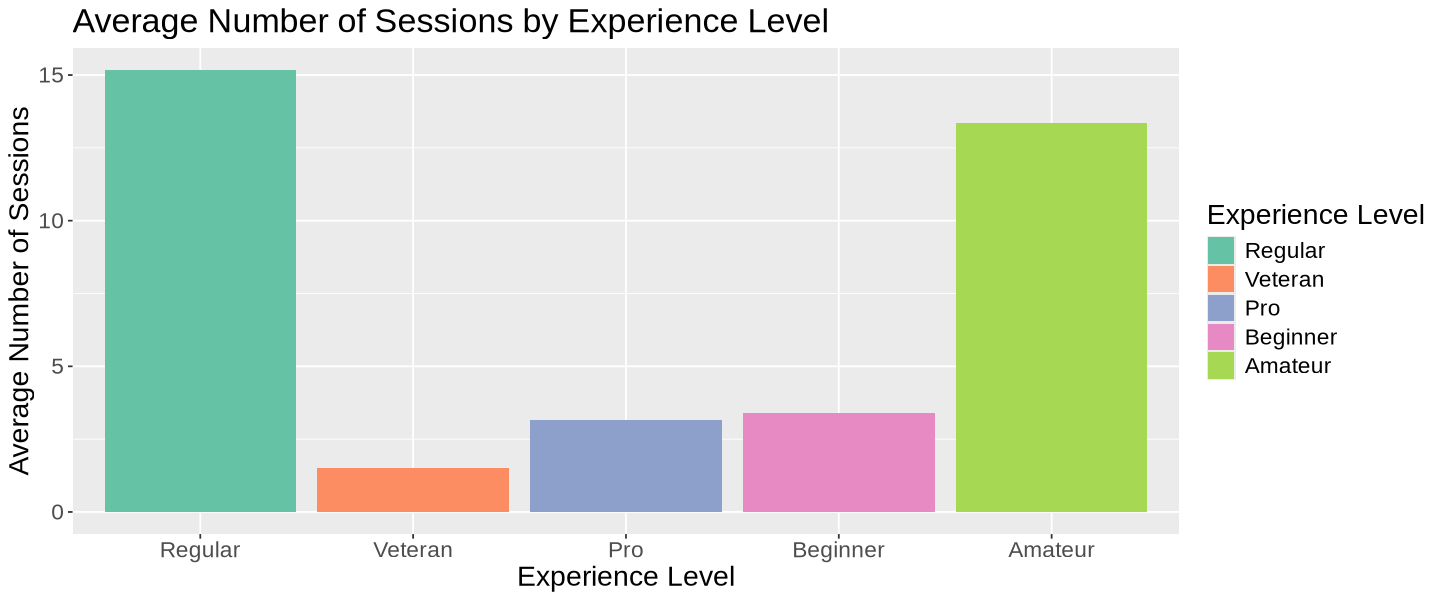

In [5]:
options(repr.plot.width = 12, repr.plot.height = 5)

# Bar plot of total sessions by experience level
ggplot(player_sessions, aes(x = experience, y = total_sessions, fill = experience)) +
  geom_bar(stat = "summary", fun = "mean") +
  labs(title = "Average Number of Sessions by Experience Level",
       x = "Experience Level",
       y = "Average Number of Sessions",
       fill = "Experience Level") +
  scale_fill_brewer(palette = "Set2") +  
  theme(text = element_text(size = 17))

#### Plot total number of minutes played

To determine if and how total number of minutes played differs by player experience, we use `ggplot` to create a bar graph of the mean number of minutes played based on experience level.

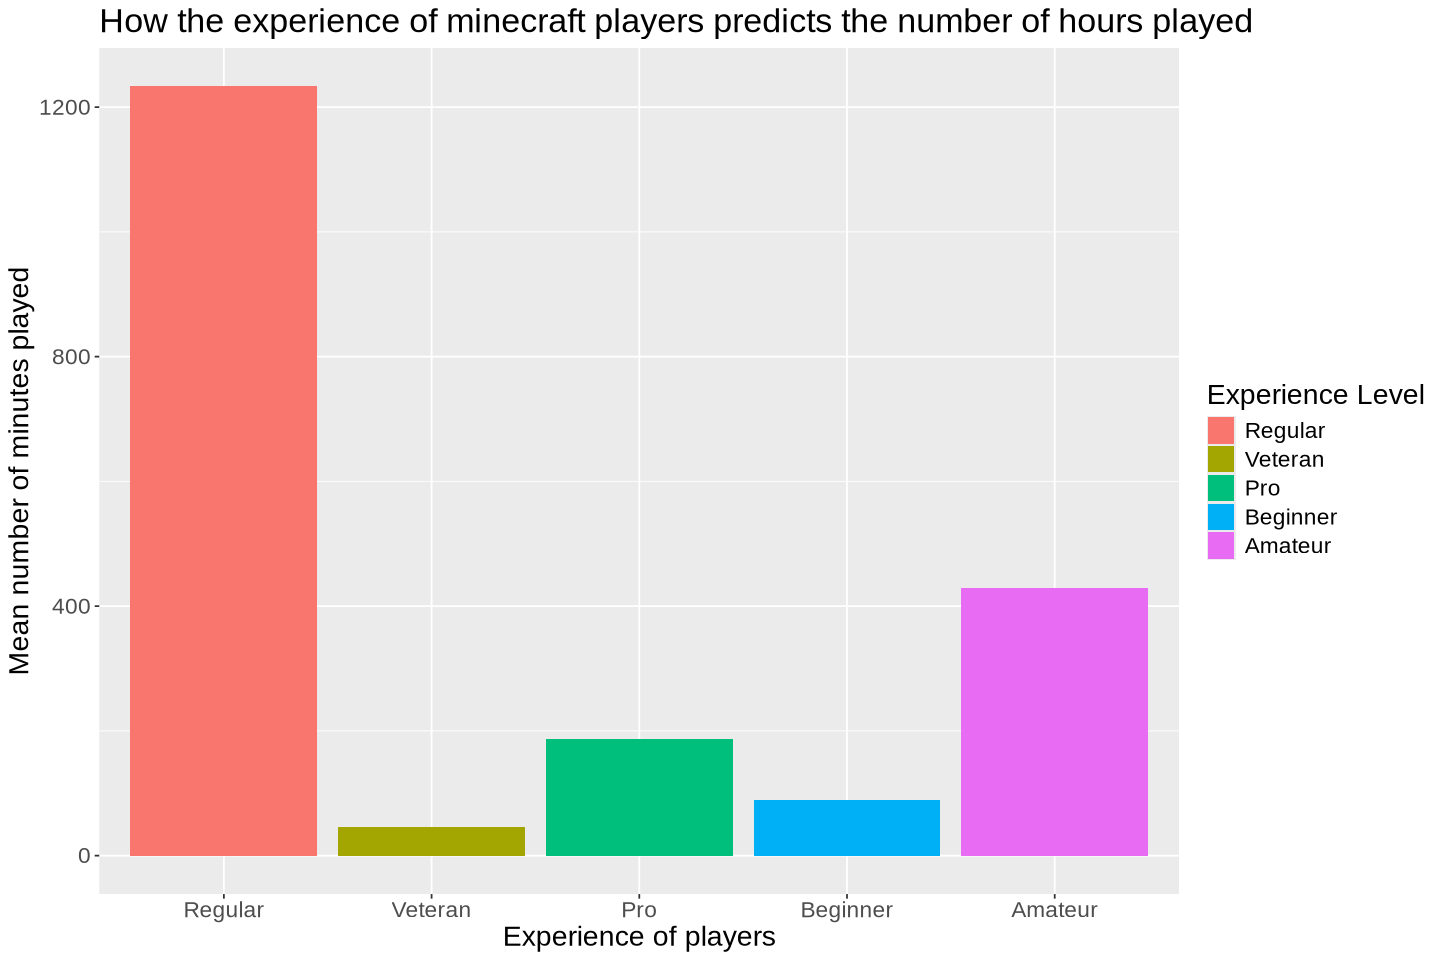

In [6]:
options(repr.plot.width = 12, repr.plot.height = 8)

age_v_hours <- player_sessions |>
    ggplot( aes(x = experience, y = total_mins, fill = experience)) +
    geom_bar(stat = "summary", fun = "mean") +
    #facet_grid(cols = vars(experience))	+
    ggtitle("How the experience of minecraft players predicts the number of hours played") +  
    labs(x = "Experience of players", y = "Mean number of minutes played", fill = "Experience Level") +
    theme(text = element_text(size = 17))

age_v_hours

#### Plot the number of sessions vs the total number of minutes played
We use `ggplot` to create a scatterplot graph of how the number of sessions of a user predicts the total number of minutes played. We colour points based on player experience.

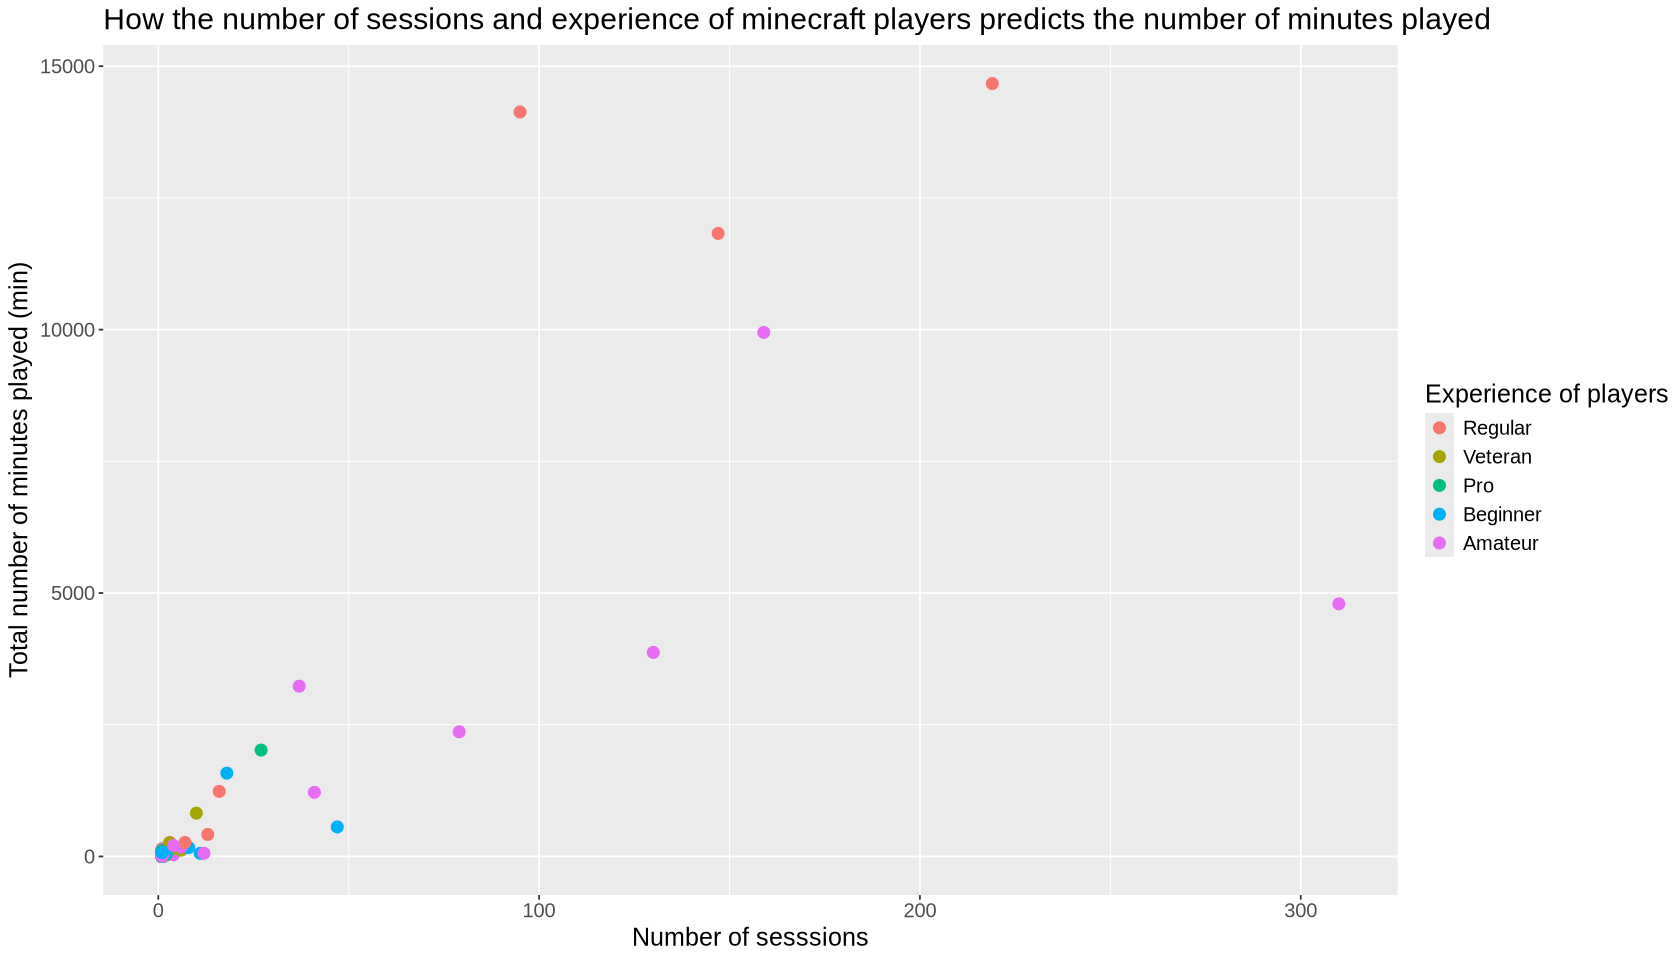

In [7]:
options(repr.plot.width = 14, repr.plot.height = 8)

sessions_v_mins <- player_sessions |>
    ggplot(aes(x =  total_sessions, y = total_mins, colour = experience)) + 
    geom_point(size = 3) + 
    ggtitle("How the number of sessions and experience of minecraft players predicts the number of minutes played") +  
    labs(x = "Number of sesssions", y = "Total number of minutes played (min)", colour = "Experience of players") +
    theme(text = element_text(size = 15)) 
   
sessions_v_mins


#### Log transform the above plot

The above graph shows many points clumped around a very low number of minutes played and number of sessions, making it hard to see an overall trend. There are many outliers with a high number of minutes and sessions skewing the graph. We therefore log-transformed the axes to better understand the trends in our data. 

When both axes are log transformed, the data show a linear trend between number of sessions and total minutes played. 

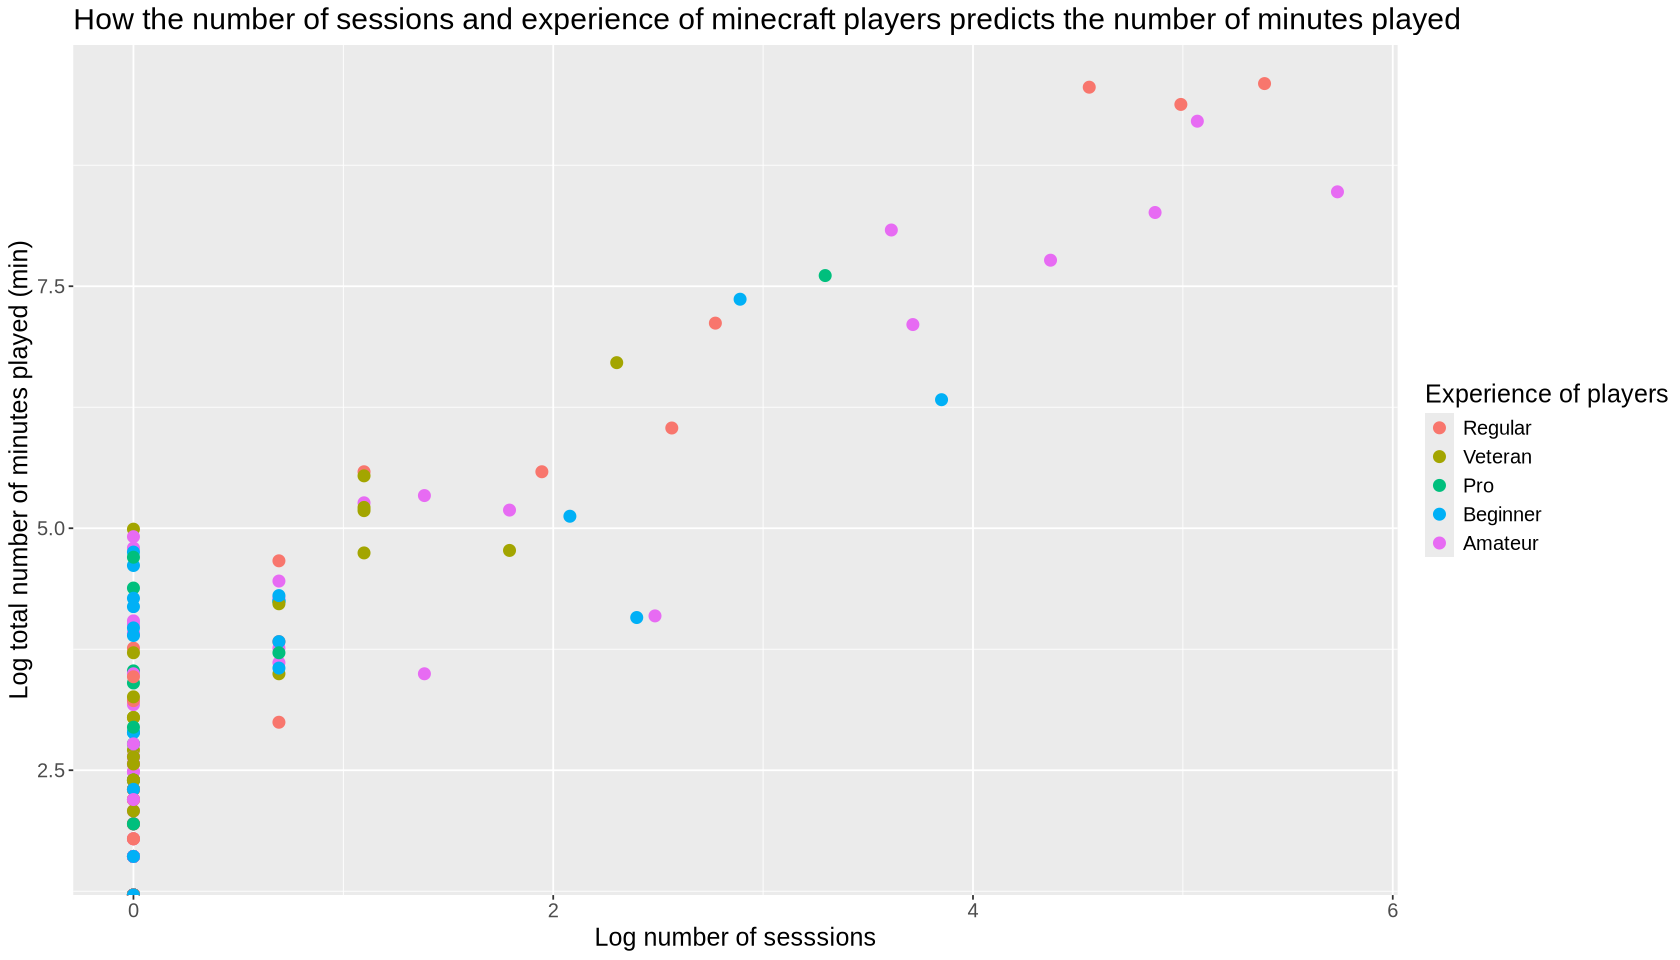

In [8]:
options(repr.plot.width = 14, repr.plot.height = 8)

log_sessions_v_mins <- player_sessions |>
    ggplot(aes(x = log(total_sessions), y = log(total_mins), colour = experience)) + 
    geom_point(size = 3) + 
    ggtitle("How the number of sessions and experience of minecraft players predicts the number of minutes played") +  
    labs(x = "Log number of sesssions", y = "Log total number of minutes played (min)", colour = "Experience of players") +
    theme(text = element_text(size = 15))

log_sessions_v_mins


#### Convert experience to a numeric variable

To use experience as one of our predictors, we must first convert it from a character variable to a numeric variable using the function `mutate`. Experience is an ordinal categorical variable as there is a clear rank of each experience level. We therefore assign each category a rank based on how experienced they are, from 0 to 4 in the order of Amateur, Begeinner, Regular, Pro, Veteran. 

In [9]:
#convert experience to a numerical variable
players_ranked <- player_sessions |>
    mutate(experience_rank = case_when(
        experience == "Amateur"  ~ 0,
        experience == "Beginner" ~ 1,
        experience == "Regular"  ~ 2,
        experience == "Pro"      ~ 3, 
        experience == "Veteran"  ~ 4,
    ))
players_ranked

hashedEmail,total_sessions,experience,age,total_mins,experience_rank
<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,Regular,20,106,2
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,1,Veteran,17,0,4
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,Pro,21,30,3
⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,Amateur,23,4795,0
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,Amateur,17,9,0
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,Beginner,20,72,1


### Create a KNN Regression model

#### Assign a train-test split
To create a knn regression model, we first split our data into a training and testing set using `initial_split`. We use the proportions of 75% to 25% to ensure there is enough data to train the model while leaving enough data to test it as well.

In [10]:
player_sessions_split <- initial_split(players_ranked, prop = 0.75, strata = total_mins)
player_sessions_train <- training(player_sessions_split)
player_sessions_test <- testing(player_sessions_split)

#### Create model, recipe, and workflow

First we create the player sessions recipe (called `ps_recipe`) where `total_sessions` and `experience_rank` are used to predict `total_mins`. We scaled and centered by only `total_sessions` as experience is a ranked categorical variable. 

We then created the model `ps_spec` using the `nearest_neighbors` function and the `"kknn"` engine to create a knn regression model. We set the `neighbors = tune()` to determine which number of neighbors (k) best predicts our data. 

We then added the recipe and model to a workflow titled `ps_wkflw`

In [11]:
set.seed(2019)

ps_recipe <- recipe(total_mins ~ total_sessions + experience_rank, data = player_sessions_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
#check whether or not to use all predictors

ps_spec <- nearest_neighbor(weight_func = "rectangular", 
                            neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

ps_wkflw <- workflow() |>
    add_recipe(ps_recipe) |>
    add_model(ps_spec)
ps_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


#### Use Cross Validation to find k

We first create a tibble called `gridvals` of all the k values we want to test. Since there are 196 rows in our data, we will test up to 98 neighbours. Past 98 nearest neighbours, the model will just return the most common value as more than half the data is being used as a nearest neighbor. We increase the number of neighbors by 2 to reduce the amount of computation necessary by the model. 

We run cross validation using the function `vfold_cv` with 5 folds to allow for accurate prediction of k that is not biased by a random train - validation split but does not require too much computational power. 

We then use the function `collect_metrics()` to print the rmse (Root Mean Squared Error) of the model, which can give us an indication on how well our model will perform. 

In [21]:
#compute metrics (RMPSE) to determine the best k
set.seed(2019) #set seed

# I'll change the gridvalues to ones that make sense later
gridvals <- tibble(neighbors = seq(from = 1, to = 98, by = 2))

ps_vfold <- vfold_cv(player_sessions_train, v = 5, strata = total_mins)

ps_results <- ps_wkflw |>
    tune_grid(resamples = ps_vfold, grid = gridvals) |>
    collect_metrics()


ps_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,964.2373771,5,432.1054245,Preprocessor1_Model01
1,rsq,standard,0.6278036,5,0.1553487,Preprocessor1_Model01
3,rmse,standard,825.8411011,5,307.5749582,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
95,rsq,standard,0.5269925,5,0.1550389,Preprocessor1_Model48
97,rmse,standard,1714.9150150,5,626.1363432,Preprocessor1_Model49
97,rsq,standard,0.5276487,5,0.1548909,Preprocessor1_Model49


#### Choose K

We then print the row with the lowest rmse to determine which number of neighbours results in the best model. 

In [22]:
set.seed(2019)

ps_min <- ps_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1)
ps_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,825.8411,5,307.575,Preprocessor1_Model02


#### Train the KNN regression

We then train the KNN regression model using the number iof k we determined to be best above. 
We train the model on the training dataset from the `player_sessions_train`. 

We then use the trained KNN regression model to predict the total number of minutes played based on the experience and total sessions data in the testing dataset. 

We then print how effective the model was in predicting minutes played compared to the true minutes played of the testing data using `metrics`

In [23]:
set.seed(2019) # DO NOT REMOVE

k_min <- ps_min |>
          pull(neighbors)

ps_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
          set_engine("kknn") |>
          set_mode("regression")

ps_best_fit <- workflow() |>
          add_recipe(ps_recipe) |>
          add_model(ps_best_spec) |>
          fit(data = player_sessions_train)

ps_summary <- ps_best_fit |>
           predict(player_sessions_test) |>
           bind_cols(player_sessions_test) |>
           metrics(truth = total_mins, estimate = .pred)

# your code here
ps_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1070.7871580
rsq,standard,0.9411499
mae,standard,219.9733333


#### Print predictions

We print the predicted number of minutes played compared to the number of sessions for the first 6 users in the testing dataset

In [24]:
set.seed(2019) # DO NOT CHANGE

# your code here

ps_preds <- ps_best_fit |>
           predict(player_sessions_test) |>
           bind_cols(player_sessions_test) 

head(ps_preds)

.pred,hashedEmail,total_sessions,experience,age,total_mins,experience_rank
<dbl>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>
4,11bf6125c4264b3a8f3bffa57b33bd598e2ea1ecd6331ad3bc54aa88e22db035,1,Amateur,23,0,0
4,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,1,Amateur,17,12,0
4,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,1,Amateur,21,50,0
4,2917e2dacafed92d017b9f356ce90a442bea6e4ad59dbbb484a920398acb8974,1,Amateur,26,5,0
4,2cfed571797b66cc810c32562fc5b0f70b5bec0f5250799245527135bbf9662e,1,Amateur,16,6,0
0,32f753965c7b684cdda8cb19ff9c8734a9afa41a4ddf4a1dfb9594097d78e1a7,1,Regular,20,0,2


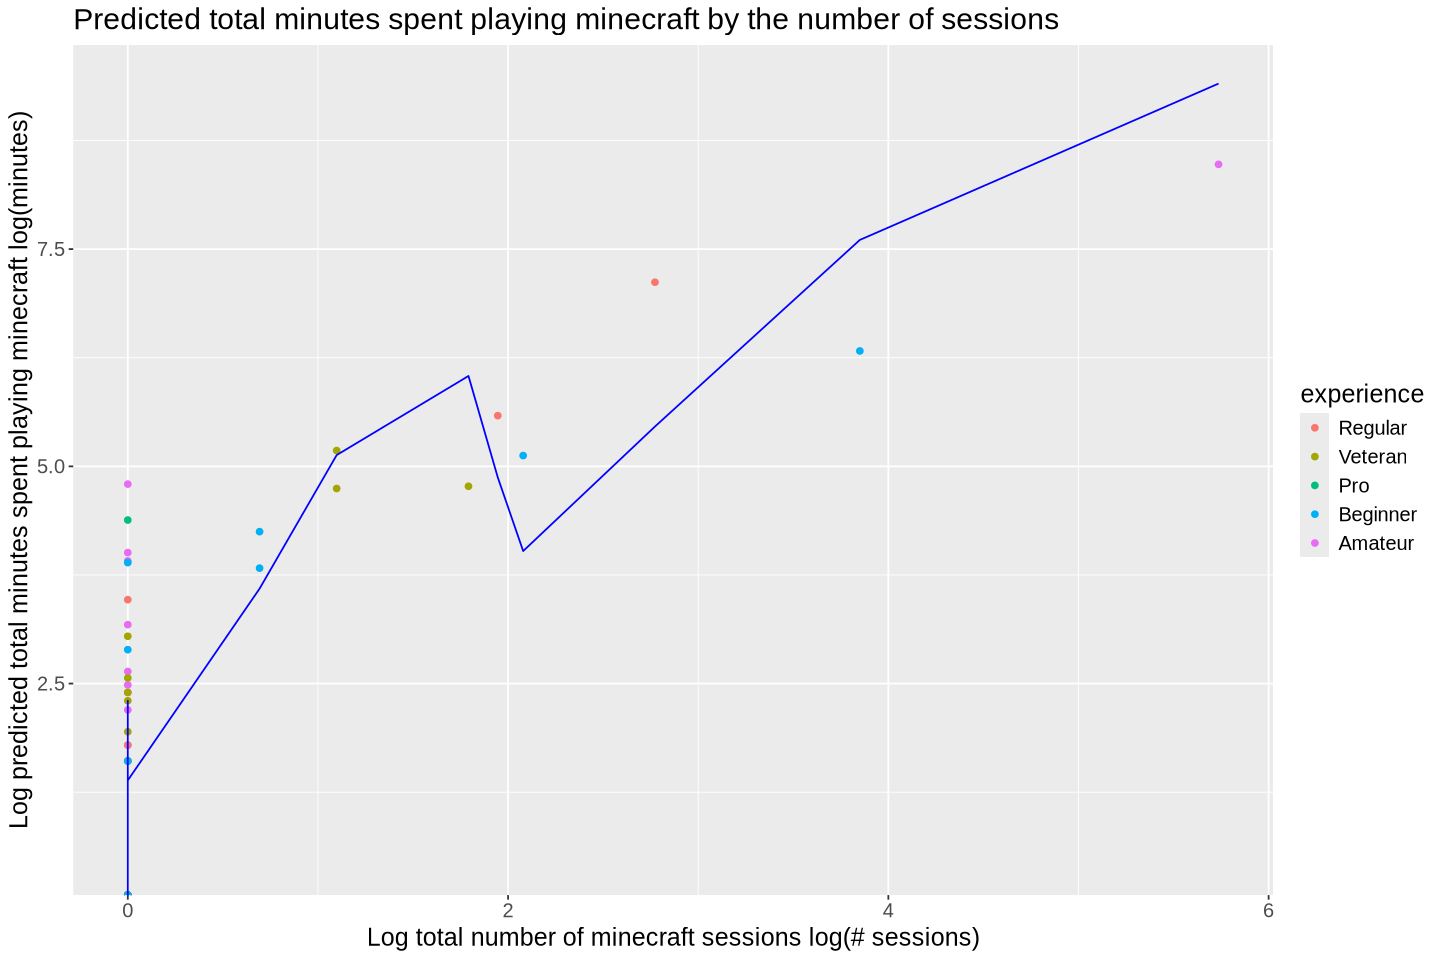

In [25]:
options(repr.plot.width = 12, repr.plot.height = 8)

ps_plot <- ps_preds |>
            ggplot(aes(x = log(total_sessions), y = log(total_mins), color = experience)) + 
            geom_point() + 
            geom_line(aes(x = log(total_sessions), y = log(.pred)), color = "blue") + 
            ggtitle("Predicted total minutes spent playing minecraft by the number of sessions") +
            xlab("Log total number of minecraft sessions log(# sessions)") + 
            ylab("Log predicted total minutes spent playing minecraft log(minutes)") +
            theme(text = element_text(size = 15))


ps_plot